In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_original = pd.read_csv('BankChurners.csv')
dropColumns = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
               'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
df = df_original.drop(columns=dropColumns)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [50]:
education_levels = ['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']
dept_means = pd.DataFrame(index = education_levels, columns = ['Mean'])
for level in education_levels:
    mean = list(df.loc[df['Education_Level'] == level, ['Total_Revolving_Bal']].mean())
    dept_means.loc[level, ['Mean']] = mean
dept_means

,Mean
Unknown,1160.45
Uneducated,1154.08
High School,1194.35
College,1135.78
Graduate,1162.38
Post-Graduate,1187.67
Doctorate,1094.08


<AxesSubplot:>

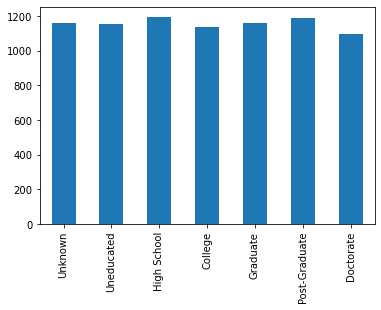

In [52]:
dept_means.plot(kind='bar', legend=False)

People with doctorate tend to be more reposible with teir account, but in general there is not a significant difference between the different levels of education.

In [69]:
income_levels = ['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']
dept_means_income = pd.DataFrame(index = income_levels, columns = ['Mean'])
for level in income_levels:
    mean = list(df.loc[df['Income_Category'] == level, ['Total_Revolving_Bal']].mean())
    dept_means_income.loc[level, ['Mean']] = mean
dept_means_income

,Mean
Unknown,1115.06
Less than $40K,1145.14
$40K - $60K,1171.99
$60K - $80K,1154.99
$80K - $120K,1206.73
$120K +,1222.2


<AxesSubplot:>

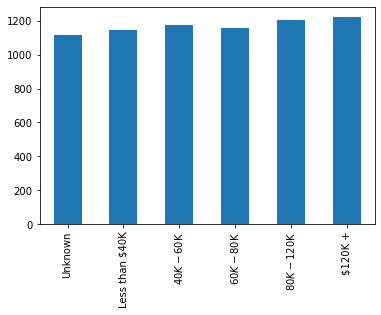

In [56]:
dept_means_income.plot(kind='bar', legend=False)

It seems like there is a small trend in the revolving values, the higher the salary implies the higher the revolving value. But does this mean that the people with higher salaries are less responsable? I don't think so, because the increase is very small and the dept are not proportional. For example, if you have an income of \\$20k and your revolving is \\$500 is not the same as someone with an income of 80k and a revolving of \\$500. In order to make it more proportional we will divide the mean by the medium value of the income. To do so we have to remove the unknown and consider as \\$140k the mid value of \\$120k+ which is false, should be much higher but we can't have the mid value of \\$120k and infinite, so this value should work just as informative.

In [70]:
dept_means_income_proportional = dept_means_income.iloc[1:6, 0]
dept_means_income_proportional.loc['Less than $40K',] /= 20
dept_means_income_proportional.loc['$40K - $60K',] /= 50
dept_means_income_proportional.loc['$60K - $80K',] /= 70
dept_means_income_proportional.loc['$80K - $120K',] /= 100
dept_means_income_proportional.loc['$120K +',] /= 140
dept_means_income_proportional

Less than $40K    57.2568
$40K - $60K       23.4399
$60K - $80K       16.4999
$80K - $120K      12.0673
$120K +           8.72998
Name: Mean, dtype: object

<AxesSubplot:>

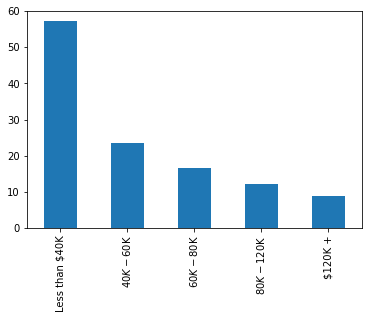

In [72]:
dept_means_income_proportional.plot(kind='bar', legend=False)

Once is made more proporcional we can apretiate a clear trend, the higher the income the lower the revolving value in proportional measures.